In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')

Q1.Show first 5 records of dataset?
Q2.How many records and columns are in dataset?
Q3.Show the datatypes of different columns.handle the missing values.
Q4.What was the total number of sales? What branch has the highest number of sales?
Q5.What type of product is sold the most?
Q6.What is the average sales of electoniv=cs accessories?
Q7.What gender buy more items in each category? what is the category?
Q8.What is the favorite method of payment of the members? of the normal customers?
Q9.What time should we display an advertisement to maximize the revenue?
Q10.What does the customer rating look like and is it skewed?
Q11.Does gross income affect the ratings that the customers provide?
Q12.Is there any relationship between Gender and Gross income?
Q13.What is the spending pattern of females and males and in which 
category do they spend a lot?
Q14.Analyze the pairwise relationship between the numeric variables?


In [2]:
sm=pd.read_csv('supermarket_sales .csv')
sm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [81]:
sm.describe(include='O')

,invoice_id,branch,city,customer_type,gender,product_line,date,time,payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


### Q1.Show first 5 records of dataset?

In [3]:
sm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Q2.How many records and columns are in dataset?

In [5]:
sm.shape

(1000, 17)

### Q3.Show the datatypes of different columns.handle the missing values.

In [8]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
sm.isnull().sum() #There are no missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
sm.columns=[col.lower().replace(' ',"_") for col in sm.columns]

In [12]:
print(sm.columns.to_list())

['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date', 'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']


### Q4.What was the total number of sales? What branch has the highest number of sales?

In [88]:
sm['total'].sum()

322966.749

In [18]:
sm['branch'].max()

'C'

In [92]:
sm.groupby(['branch'])['total'].sum().sort_values(ascending=False)

branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: total, dtype: float64

### Q5.What type of product is sold the most?

In [84]:
sm['product_line'].max()

'Sports and travel'

### Q6.What is the average sales of electoniv=cs accessories?

In [22]:
sm.loc[sm['product_line']=='Electronic accessories'].total.mean()

319.63253823529413

### Q7.What gender buy more items in each category? what is the category?

In [68]:
sm.groupby(['product_line'])['gender'].value_counts().sort_values(ascending=False)

product_line            gender
Fashion accessories     Female    96
Food and beverages      Female    90
Health and beauty       Male      88
Sports and travel       Female    88
Electronic accessories  Male      86
                        Female    84
Food and beverages      Male      84
Fashion accessories     Male      82
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Male      78
Health and beauty       Female    64
Name: gender, dtype: int64

### Q8.What is the favorite method of payment of the members? of the normal customers?

In [74]:
sm.loc[sm['customer_type']=='Normal'].payment.max()

'Ewallet'

<AxesSubplot:>

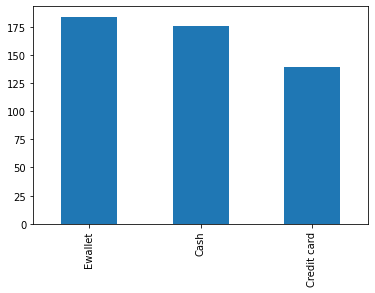

In [75]:
sm.loc[sm['customer_type']=='Normal'].payment.value_counts().plot.bar()

### Q9.What time should we display an advertisement to maximize the revenue?

In [78]:
sm['time'].mode()

0    14:42
1    19:48
Name: time, dtype: object

### Q10.What does the customer rating look like and is it skewed?

<AxesSubplot:xlabel='rating', ylabel='Count'>

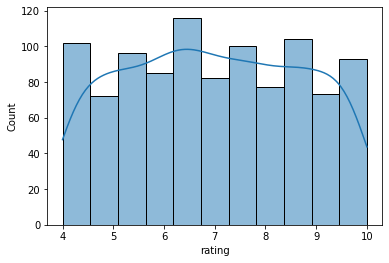

In [39]:
sns.histplot(sm.rating,kde=True)

In [41]:
sm['rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: rating, dtype: float64

Insights: Ratings lies between 4 to 10. It is not skewed. 

### Q11.Does gross income affect the ratings that the customers provide?

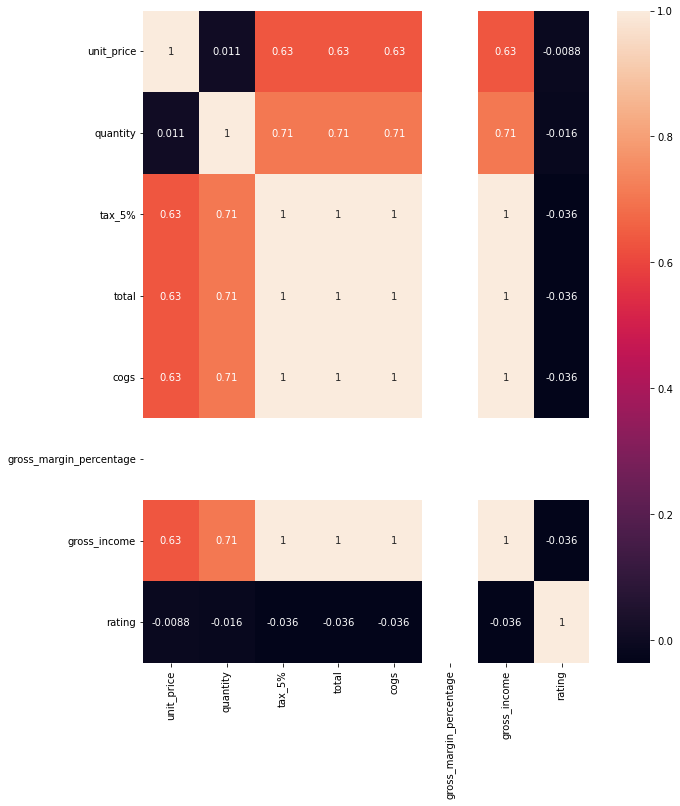

In [42]:
plt.figure(figsize=(10,12))
corr=sm.corr()
sns.heatmap(corr,annot=True)
plt.show()

Insights: Gross income slightly negatively affected by rating given by customers.

### Q12.Is there any relationship between Gender and Gross income?

<AxesSubplot:xlabel='gender', ylabel='gross_income'>

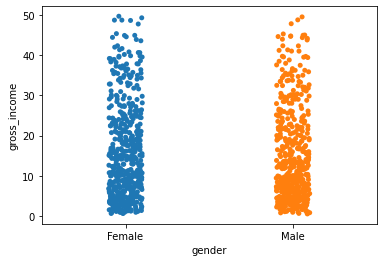

In [46]:
sns.stripplot('gender','gross_income',data=sm)#1n1c scatterplot

<AxesSubplot:xlabel='gender', ylabel='gross_income'>

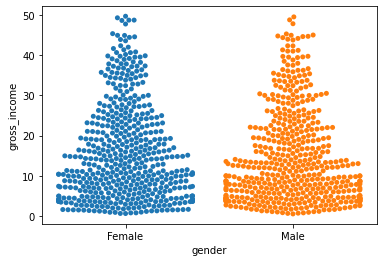

In [77]:
sns.swarmplot(sm['gender'],sm['gross_income'])

Insights: No relation as such

### Q13.What is the spending pattern of females and males and in which category do they spend a lot?

In [86]:
x=sm.groupby(['gender','product_line'])['total'].sum().sort_values(ascending=False)

In [52]:
sm.groupby(['gender','product_line'])['total'].sum().sort_values(ascending=False)

gender  product_line          
Female  Food and beverages        33170.9175
Male    Health and beauty         30632.7525
Female  Fashion accessories       30437.4000
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
Female  Electronic accessories    27102.0225
Male    Sports and travel         26548.1055
        Fashion accessories       23868.4950
        Home and lifestyle        23825.0355
        Food and beverages        22973.9265
Female  Health and beauty         18560.9865
Name: total, dtype: float64

<AxesSubplot:xlabel='gender,product_line'>

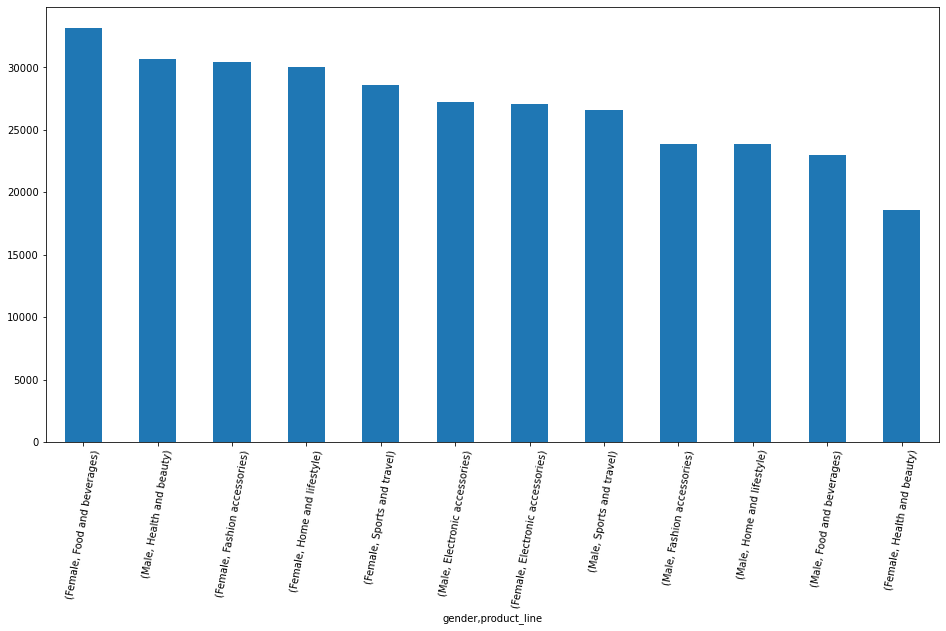

In [87]:
plt.figure(figsize=(16,8))
x.plot(kind='bar',x='Columns',rot=80)

Insights: Female  Food and beverages        33170.9175
    Male    Health and beauty         30632.7525
    

### Q14.Analyze the pairwise relationship between the numeric variables?

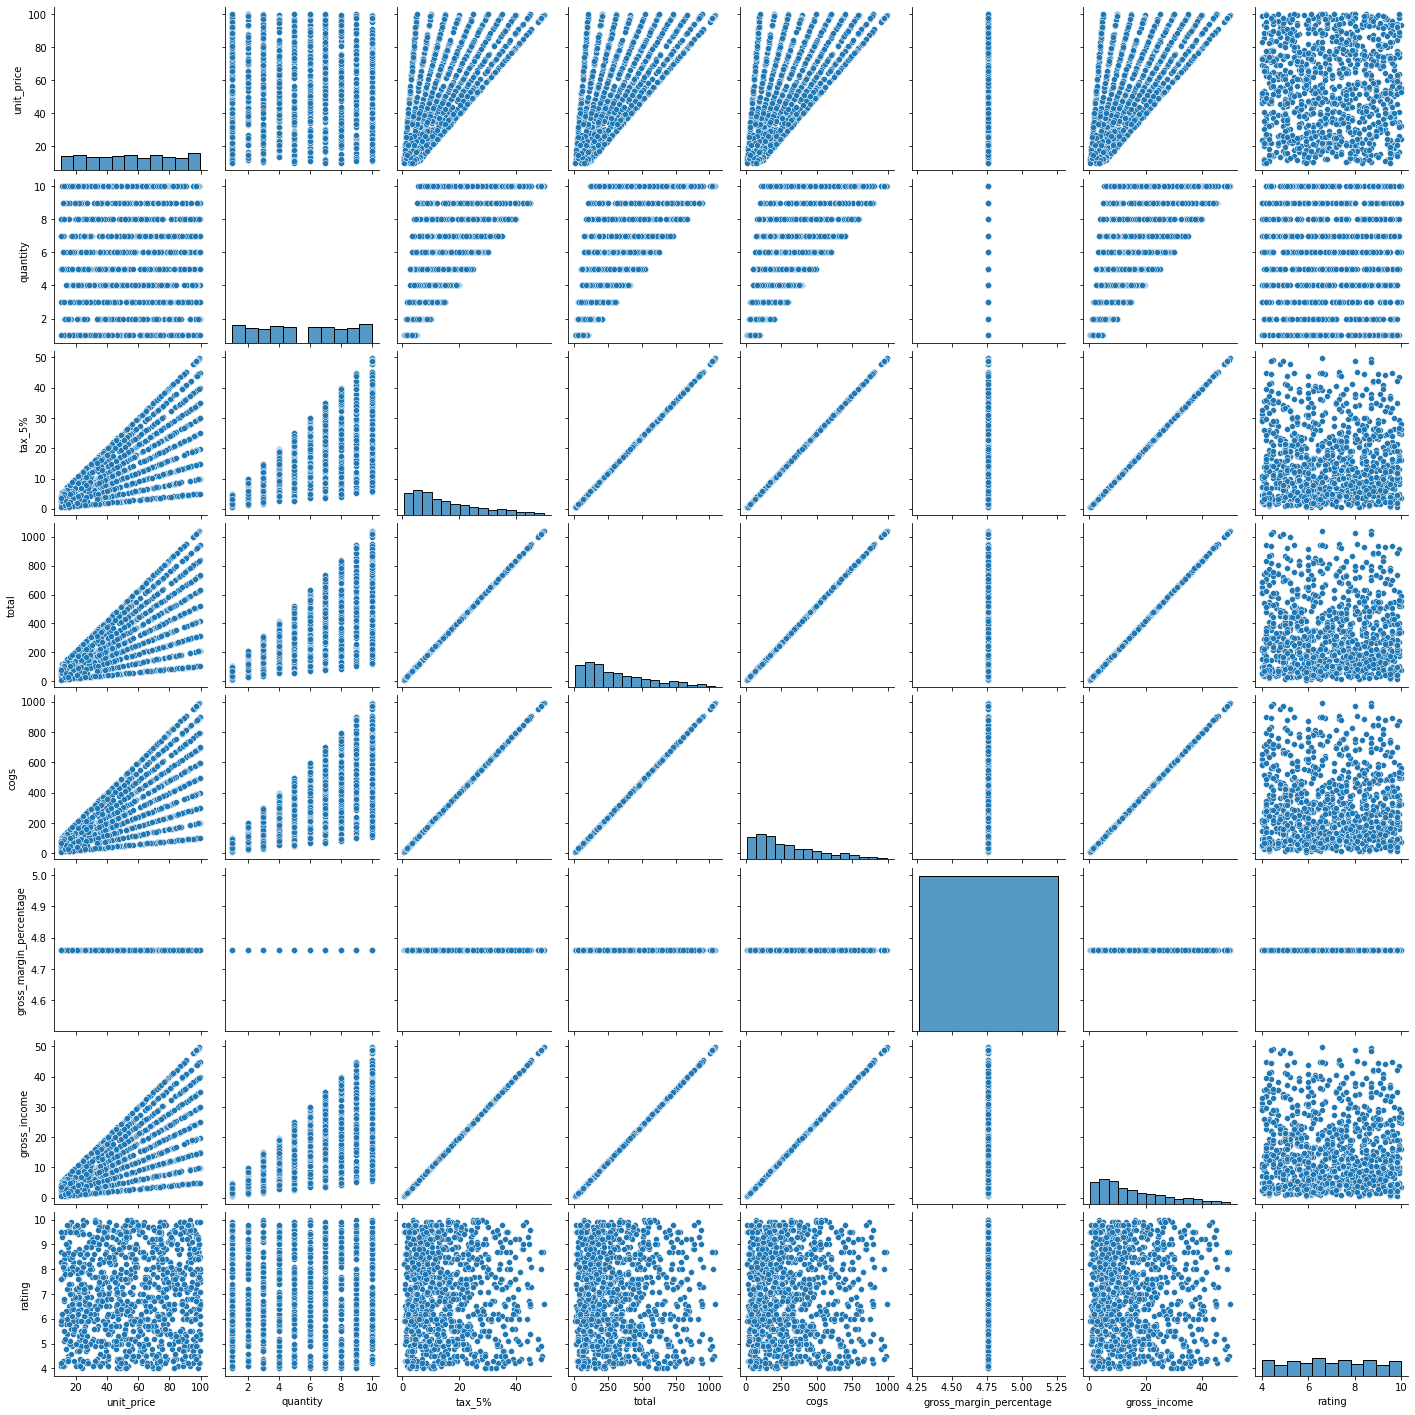

In [53]:
sns.pairplot(data=sm)